## step1

In [1]:
# 데이터 읽기용 코드셀입니다.

import pandas as pd
print('='*20, 'game.xlsx 데이터 정보입니다.', '='*20)
tmp_df = pd.read_excel('.\game.xlsx', sheet_name='Sheet1')
display(tmp_df.shape)
display(tmp_df.columns)
display(tmp_df.head())

<>:5: SyntaxWarning: invalid escape sequence '\g'
<>:5: SyntaxWarning: invalid escape sequence '\g'
C:\Users\gpfl2\AppData\Local\Temp\ipykernel_11952\3692911928.py:5: SyntaxWarning: invalid escape sequence '\g'
  tmp_df = pd.read_excel('.\game.xlsx', sheet_name='Sheet1')


==================== game.xlsx 데이터 정보입니다. ====================


(2899, 9)

Index(['user_id', 'date', 'playtime', 'playcount', 'level', 'mainjob',
       'paycount', 'payamount', 'mainjoblevel'],
      dtype='object')

,user_id,date,playtime,playcount,level,mainjob,paycount,payamount,mainjoblevel
0,1001,2024-01-10,61,1.0,15,dealer,1,60300,60
1,1001,2024-01-11,14,1.0,15,dealer,1,100,60
2,1001,2024-01-12,16,1.0,15,tanker,1,151,60
3,1001,2024-01-13,1300,3.0,15,tanker,1,1000,60
4,1001,2024-01-14,41,3.0,15,tanker,1,16000,60


## Step2

==================== features 정보입니다. ====================
(2899, 6)


,playtime,playcount,level,paycount,payamount,mainjoblevel
0,61,1.0,15,1,60300,60
1,14,1.0,15,1,100,60
2,16,1.0,15,1,151,60
3,1300,3.0,15,1,1000,60
4,41,3.0,15,1,16000,60


==================== target 정보입니다. ====================
(2899,)


0    dealer
1    dealer
2    tanker
3    tanker
4    tanker
Name: mainjob, dtype: object

==================== 분할 이후 train 데이터 크기입니다. ====================
(2319, 6)
(2319,)
==================== 분할 이후 test 데이터 크기입니다. ====================
(580, 6)
(580,)
==================== train 데이터와 test 데이터 비율 계산 결과입니다. ====================
0.7999310106933425
0.20006898930665748
==================== LabelEncoding 이전의 분포입니다. ====================


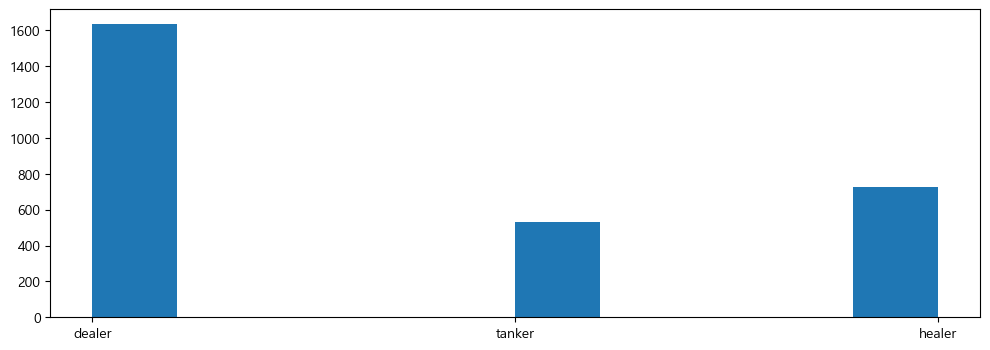

==================== LabelEncoding 이후의 분포입니다. ====================


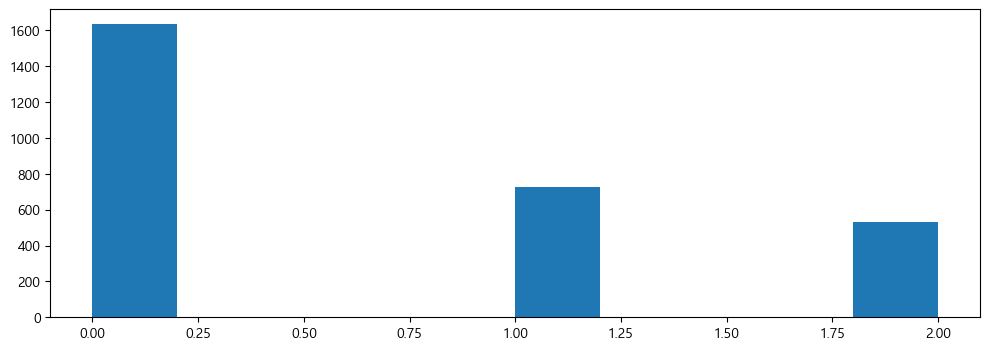

In [2]:
# features: 지정한 6개 컬럼만 선택
features = tmp_df[['playtime', 'playcount', 'level', 'paycount', 'payamount', 'mainjoblevel']]


target = tmp_df['mainjob']

print('='*20, 'features 정보입니다.', '='*20)
print(features.shape)       # (2899, 6)
display(features.head())

print('='*20, 'target 정보입니다.', '='*20)
print(target.shape)  
display(target.head())

from sklearn.model_selection import train_test_split

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    features, target,
    test_size=0.2,
    random_state=42
)



print('='*20, '분할 이후 train 데이터 크기입니다.', '='*20)
print(X_train.shape)  # (2134, 6)
print(y_train.shape)  # (2134,)



print('='*20, '분할 이후 test 데이터 크기입니다.', '='*20)
print(X_test.shape)   # (586, 6)
print(y_test.shape)   # (586,)



print('='*20, 'train 데이터와 test 데이터 비율 계산 결과입니다.', '='*20)
total_count = len(features)
train_ratio = len(X_train) / total_count
test_ratio = len(X_test) / total_count

print(train_ratio)
print(test_ratio)

from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
le = LabelEncoder()

# target 데이터(Label) 인코딩
target_encoded = le.fit_transform(target)

import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'


# 분포 확인 (이전)
print('='*20, 'LabelEncoding 이전의 분포입니다.', '='*20)

plt.figure(figsize=(12, 4))
#target.hist()
pd.Series(target).hist()
plt.grid(False) 
plt.show()

# 분포 확인 (이후)
print('='*20, 'LabelEncoding 이후의 분포입니다.', '='*20)

plt.figure(figsize=(12, 4))
pd.Series(target_encoded).hist()
plt.grid(False) 
plt.show()
